# TAREA 3 VISUALIZACION DE DATOS CON PYTHON

## Introducción

El objetivo es generar maneras intuitivas de visualizar los datos **importantes** de la base de datos que trabajamos anteriormente en la tarea 2, en nuestro caso es sobre analisis de ingresos anuales segun sus caracteristicas en el senso.

Para este proceso tenemos la siguiente manera de visualizar los datos:

- GRAFICO DE LINEA
- GRAFICO DE AREA [APILABLE, NO APILABLE]
- GRAFICO DE BARRA [HORIZONTAL, VERTICAL]
- GRAFICO DE HISTOGRAMA
- GRAFICO DE CIRCULO O TORTA
- GRAFICO DE CAJA O CAJA Y BIGOTE
- GRAFICO DE DISPERSION [2D]
- GRAFICO DE BURBUJA [3D]
- GRAFICO DE WAFFLE [NO FAIRE, TRADAJDAD]
- GRAFICO DE NUBE DE PALABRAS [WORD_CLOUD]
- GRAFICO DE DISPERSION (SEABORN)
- MAPAS (FOLLIO)


**Nota**: utilizaremos 5 maneras de representar la informacion mas importante sobre este analisis, utilizaremos las librerias **numpy**, **pandas**, **seaborn**, **matplotlib**, **openpyxl**.

***

## importamos las librerias en python

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import openpyxl as xl

## leemos la base de datos que previamente preparamos.

In [3]:
df = pd.read_csv('../dataframe/df_procesado.csv')

## Usamos las funciones head tail info y describe para tener una idea general de los datos.

In [4]:
df.head()

,Unnamed: 0,age,workclass,representation-by-Census,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,education-num-binned,<=50K,>50K
0,0,39.0,State-gov,0.052210,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,Superior,1,0
1,1,50.0,Self-emp-not-inc,0.056113,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,Superior,1,0
2,2,38.0,Private,0.145245,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,Media,1,0
3,3,53.0,Private,0.158093,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,Media,1,0
4,4,28.0,Private,0.227930,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,Superior,1,0


In [6]:
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())

   Unnamed: 0   age         workclass  representation-by-Census  education  \
0           0  39.0         State-gov                  0.052210  Bachelors   
1           1  50.0  Self-emp-not-inc                  0.056113  Bachelors   
2           2  38.0           Private                  0.145245    HS-grad   
3           3  53.0           Private                  0.158093       11th   
4           4  28.0           Private                  0.227930  Bachelors   

   education-num      marital-status         occupation   relationship   race  \
0             13       Never-married       Adm-clerical  Not-in-family  White   
1             13  Married-civ-spouse    Exec-managerial        Husband  White   
2              9            Divorced  Handlers-cleaners  Not-in-family  White   
3              7  Married-civ-spouse  Handlers-cleaners        Husband  Black   
4             13  Married-civ-spouse     Prof-specialty           Wife  Black   

      sex  capital-gain  capital-loss  hours

## Seleccionamos el estilo que queremos para lo graficos con la libreria mpl

In [26]:
print(plt.style.available)
mpl.style.use(['ggplot']) #seleccionamos el estilo "ggplot"

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Para el primer analisis seccionamos la tabla age, que tiene las edades de cada persona registrada en el analisis

filtramos los datos age y <=50k que nos serviran para saber la edad y si esta o no con un sueldo anual inferior o igual a 50k dolares (podemos hacer esto porque el <=50k guarda 1 o 0 si se cumple la condicion)

luego filtramos y separamos en 2 dataframes, quitamos la columna <=50k para que no aparezca en el grafico y presentamos los graficos de caja para compararlos.

C:\Users\Kender\AppData\Local\Temp\ipykernel_6876\1417280029.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grafico_1.drop(['<=50K'], axis=1, inplace=True)
C:\Users\Kender\AppData\Local\Temp\ipykernel_6876\1417280029.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grafico_2.drop(['<=50K'], axis=1, inplace=True)


Text(0, 0.5, 'Años')

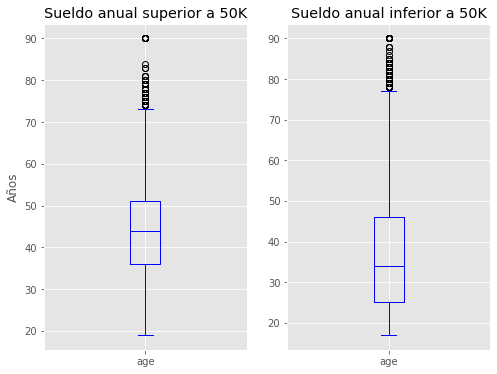

In [8]:
encabezado = ["age", "<=50K"]
df_content = pd.DataFrame(df, columns = encabezado)

grafico_1 = df_content[df_content["<=50K"] == 0]
grafico_2 = df_content[df_content["<=50K"] == 1]

grafico_1.drop(['<=50K'], axis=1, inplace=True)
grafico_2.drop(['<=50K'], axis=1, inplace=True)

fig = plt.figure() # crear figura

ax0 = fig.add_subplot(1, 2, 1) # agregar subgráfico 1 (1 fila, 2 columnas, primer gráfico)
ax1 = fig.add_subplot(1, 2, 2) # agregar subgráfico 2 (1 fila, 2 columnas, segundo gráfico). Ver consejo bajo

# Subgráfico 1: Gráfico de caja
grafico_1.plot(kind='box', color='blue', vert=True, figsize=(8, 6), ax=ax0) # agregar a subgráfico 1
ax0.set_title('Sueldo anual superior a 50K') # agregar título al gráfico


# Subgráfico 2: Gráfico de línea
grafico_2.plot(kind='box', color='blue', vert=True, figsize=(8, 6), ax=ax1) # agregar a subgráfico 2
ax1.set_title ('Sueldo anual inferior a 50K')

ax0.set_ylabel('Años')
#ax1.set_xlabel('a')

## analisis grafico 1
podemos apreciar que el grafico 2 tiene una tendencia hacia valores de edades mas bajos, lo que podria deverse a que las personas de mayor edad tienen mas experiencia para obtener mejores sueldos.

tambien podemos ver que el grafico 1 tiene un promedio mayor que el grafico 2

C:\Users\Kender\AppData\Local\Temp\ipykernel_6876\2601142998.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grafico_1.drop(['<=50K'], axis=1, inplace=True)
C:\Users\Kender\AppData\Local\Temp\ipykernel_6876\2601142998.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grafico_2.drop(['<=50K'], axis=1, inplace=True)


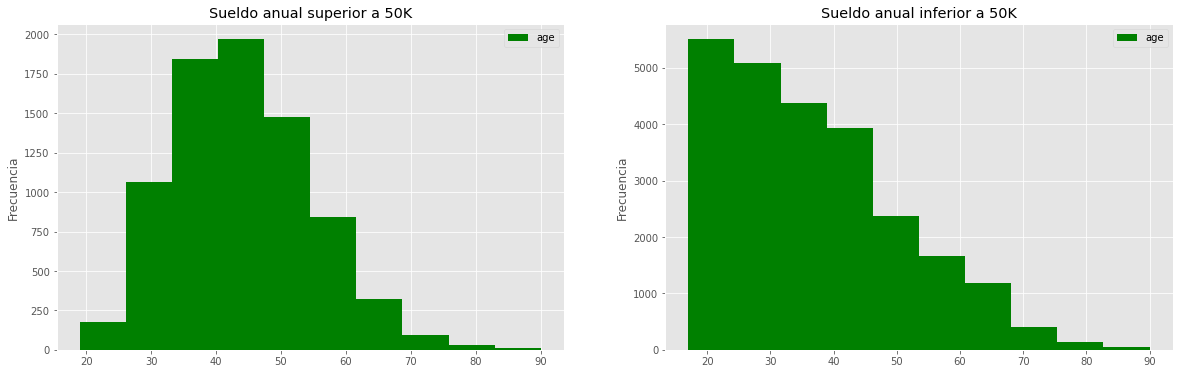

In [29]:
encabezado = ["age", "<=50K"]
df_content = pd.DataFrame(df, columns = encabezado)

grafico_1 = df_content[df_content["<=50K"] == 0]
grafico_2 = df_content[df_content["<=50K"] == 1]

grafico_1.drop(['<=50K'], axis=1, inplace=True)
grafico_2.drop(['<=50K'], axis=1, inplace=True)

fig = plt.figure() # crear figura

ax0 = fig.add_subplot(1, 2, 1) # agregar subgráfico 1 (1 fila, 2 columnas, primer gráfico)
ax1 = fig.add_subplot(1, 2, 2) # agregar subgráfico 2 (1 fila, 2 columnas, segundo gráfico). Ver consejo bajo

# Subgráfico 1: Gráfico de caja
#grafico_1.plot(kind='bar', color='green', vert=True, figsize=(8, 6), ax=ax0) # agregar a subgráfico 1

grafico_1.plot(kind='hist',
figsize=(5, 6),
ax=ax0,
color='green',     
)

# Subgráfico 2: Gráfico de línea
#grafico_2.plot(kind='bar', color='green', vert=True, figsize=(8, 6), ax=ax1) # agregar a subgráfico 2

grafico_2.plot(kind='hist',
figsize=(20, 6),
ax=ax1, 
color='green',
)
ax0.set_title('Sueldo anual superior a 50K') # agregar título al gráfico
ax1.set_ylabel('Frecuencia')
ax1.set_title ('Sueldo anual inferior a 50K')
ax0.set_ylabel('Frecuencia')

plt.show()

### analisis
podemos apreciar comparando ambos graficos que 
1. para las personas que pertenecen al tramo B (sueldo < 50k) se refleja que a medida que la edad crece
la cantidad de personas que pertenecen al tramo disminuye, por lo que podria notarse una correlacion.

2. para las personas que pertenecen al tramo A (sueldo > 50k) se refleja que tiene una tendencia mas central en torno a los 40 - 50 años, podriamos decir que es la edad optima para generar ingresos.

In [32]:
encabezado = ["sex"] #["sex", "<=50K"]
df_content = pd.DataFrame(df, columns = encabezado)

print(df_content["sex"].unique())
#df_content["sex"].unique()

print(df_content["sex"].value_counts())
#["male", "female"]

df_sex = df_content.groupby('sex', axis=0).sum()

plt.figure(0, (10,10))

plt.pie(df_content["sex"].value_counts().array, labels=df_content["sex"].unique())
plt.title("(Male / Female) distribution")

['Male' 'Female']
Male      21781
Female    10766
Name: sex, dtype: int64


TypeError: 'str' object is not callable

<Figure size 720x720 with 0 Axes>

### analisis
podemos apreciar la proporcion hombres/mujeres de la muestra
aproximadamente 67% de las personas son hombres y 33% de las personas son mujeres

Text(0.5, 1.0, 'Distribución de trabajos')

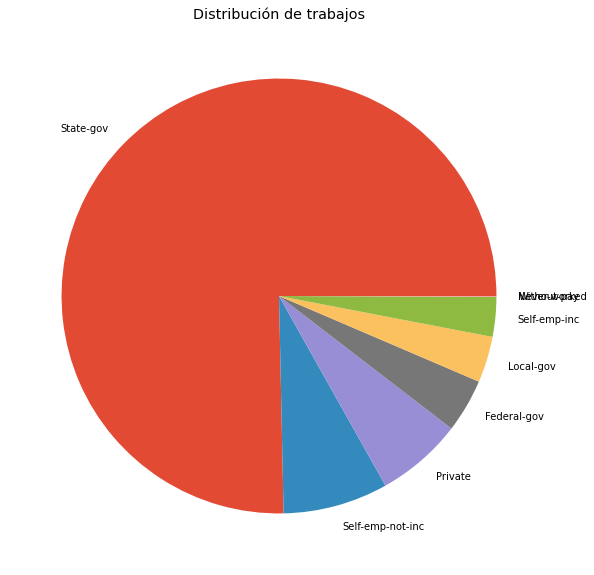

In [11]:
encabezado = ["workclass"]
df_content = pd.DataFrame(df, columns = encabezado)

plt.figure(0, (10,10))
plt.pie(df_content["workclass"].value_counts().array, labels=df_content["workclass"].unique())
plt.title('Distribución de trabajos')

Text(0.5, 1.0, 'Education')

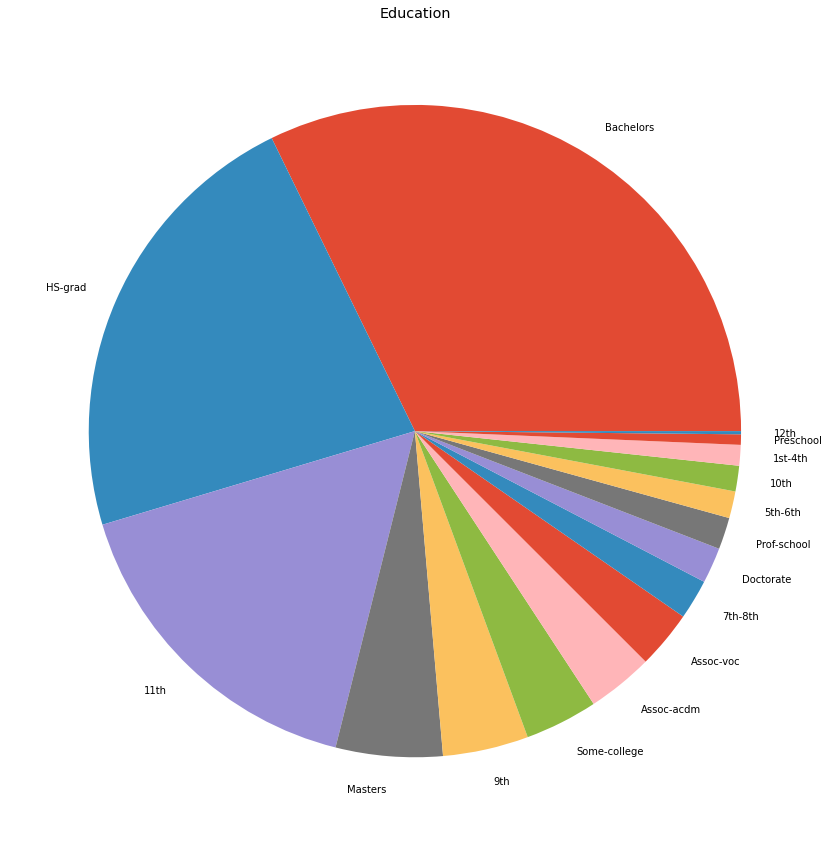

In [12]:
encabezado = ["education"]
df_content = pd.DataFrame(df, columns = encabezado)

plt.figure(0, (15,15))
plt.pie(df_content["education"].value_counts().array, labels=df_content["education"].unique())
plt.title("Education")

Text(0.5, 1.0, 'Ocupación')

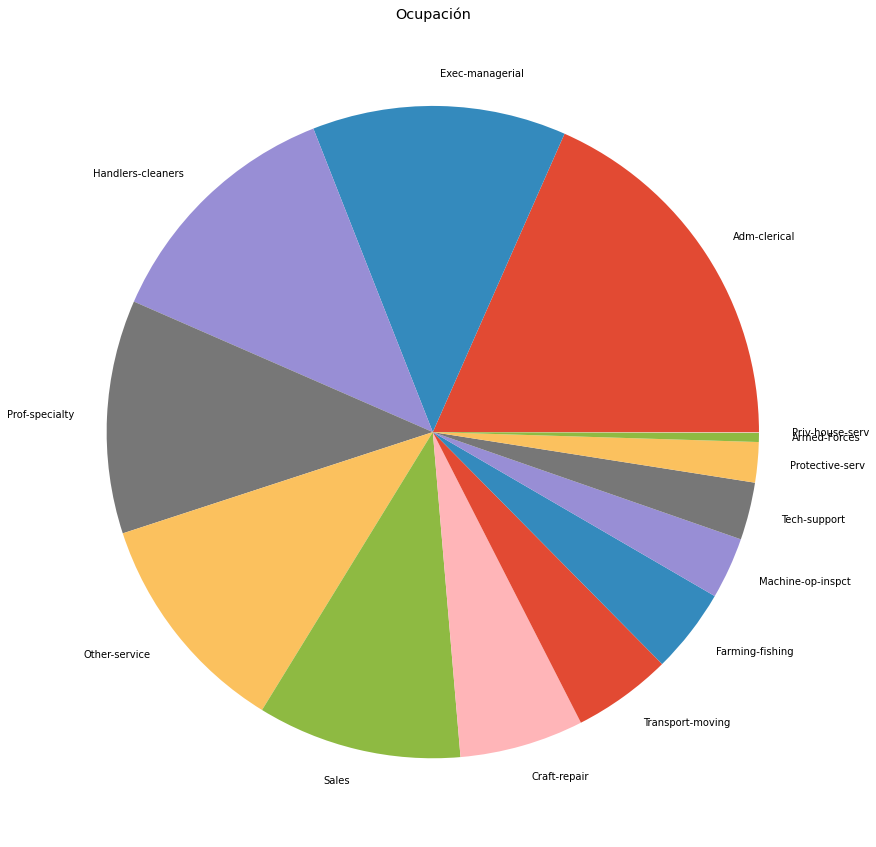

In [13]:
encabezado = ["occupation"]
df_content = pd.DataFrame(df, columns = encabezado)

plt.figure(0, (15,15))
plt.pie(df_content["occupation"].value_counts().array, labels=df_content["occupation"].unique())
plt.title("Ocupación")

Text(0.5, 1.0, 'Nieves aducativos de la muestra')

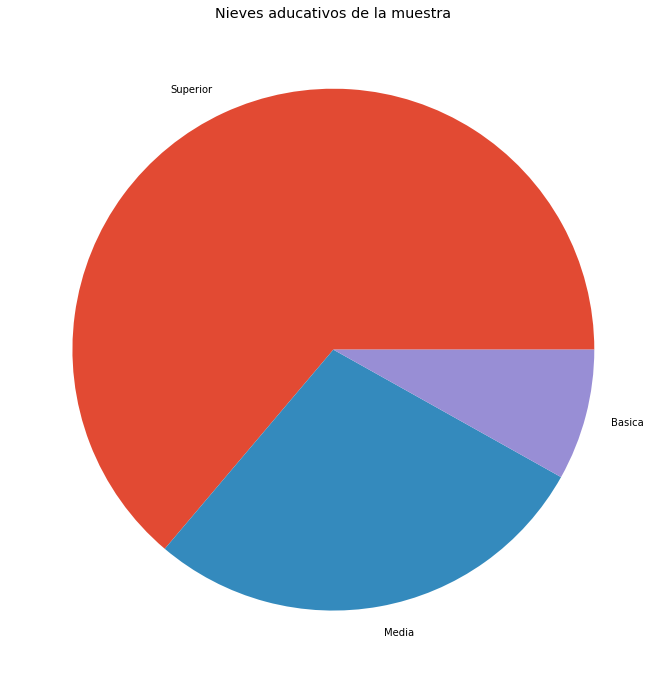

In [14]:
encabezado = ["education-num-binned"]
df_content = pd.DataFrame(df, columns = encabezado)

plt.figure(0, (12,12))
plt.pie(df_content["education-num-binned"].value_counts().array, labels=df_content["education-num-binned"].unique())
plt.title("Nieves aducativos de la muestra")

        age
0      39.0
1      50.0
2      38.0
3      53.0
4      28.0
...     ...
32542  27.0
32543  40.0
32544  58.0
32545  22.0
32546  52.0

[32547 rows x 1 columns]


Text(0.5, 1.0, 'age distribution')

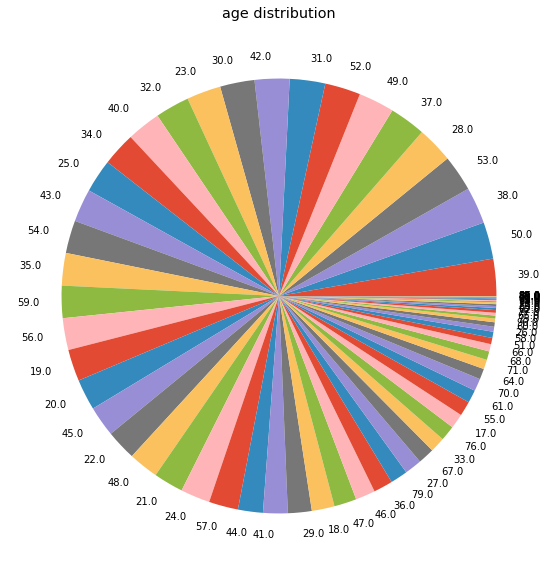

In [15]:
columnString = "age"
encabezado = [columnString]
df_content = pd.DataFrame(df, columns = encabezado)

print(df_content)

plt.figure(figsize=(10,10))
plt.pie(df_content[columnString].value_counts().array, labels=df_content[columnString].unique())
plt.title(columnString + " distribution")

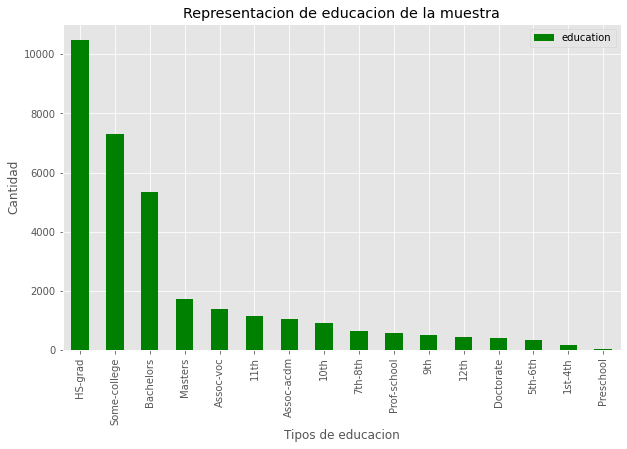

In [16]:
df_education = df.groupby('education', axis=0).sum()

# df_education = df["education"].sum()
# print( df["education"].sum() )

df_education = df["education"].value_counts().to_frame()

df_education.plot(kind='bar', figsize=(10, 6), color='green')

plt.xlabel('Tipos de educacion') # agrega al gráfico la etiqueta del eje x
plt.ylabel('Cantidad') # agrega al gráfico la etiqueta del eje y
plt.title('Representacion de educacion de la muestra') # agrega al gráfico el título

plt.show()

                     race
White               27802
Black                3124
Asian-Pac-Islander   1039
Amer-Indian-Eskimo    311
Other                 271


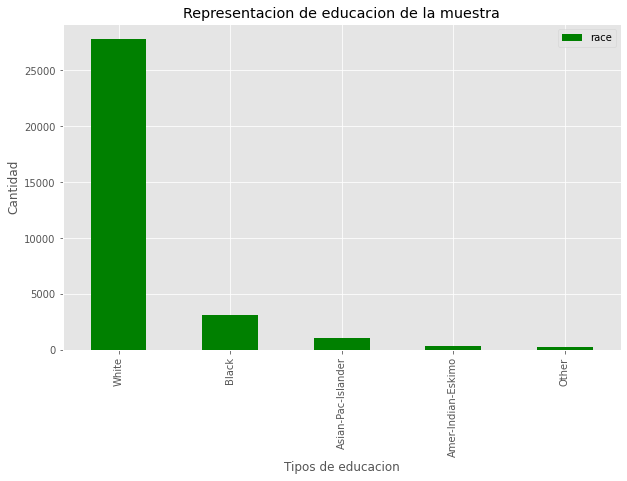

In [17]:
df_education = df.groupby('race', axis=0).sum()

# df_education = df["education"].sum()
# print( df["education"].sum() )

df_education = df["race"].value_counts().to_frame()

print(df["race"].value_counts().to_frame())

df_education.plot(kind='bar', figsize=(10, 6), color='green')

plt.xlabel('Tipos de educacion') # agrega al gráfico la etiqueta del eje x
plt.ylabel('Cantidad') # agrega al gráfico la etiqueta del eje y
plt.title('Representacion de educacion de la muestra') # agrega al gráfico el título

plt.show()

Text(0.5, 0, 'Años')

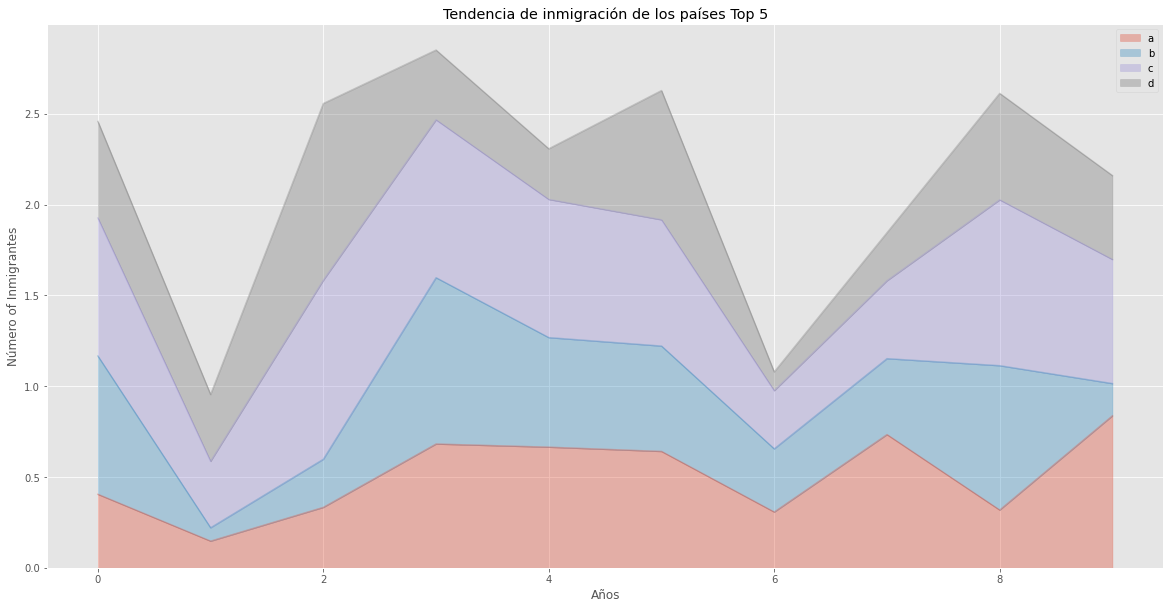

In [18]:
df_new_data = [0, 1, 2, 2, 1, 5, 6, 7, 8, 6, 5, 7]

df_new_data = pd.DataFrame( np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'] )

df_new_data.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
plt.title('Tendencia de inmigración de los países Top 5')
plt.ylabel('Número of Inmigrantes')
plt.xlabel('Años')

Número total de cuadrados: 400
White: 342
Black: 38
Asian-Pac-Islander: 13
Amer-Indian-Eskimo: 4
Other: 3


TypeError: 'str' object is not callable

<Figure size 432x288 with 0 Axes>

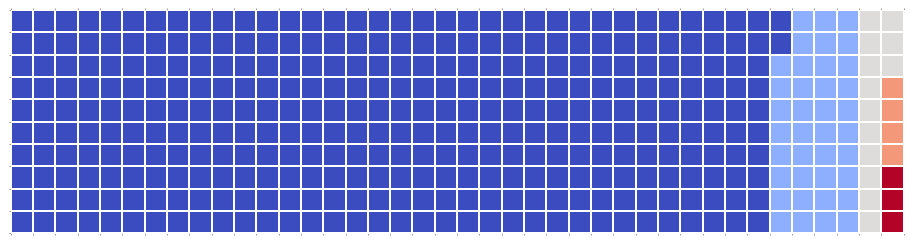

In [51]:
import matplotlib.patches as mpatches # necesario para los gráficos de waffle

race =df['race'].value_counts()
encabezado = ["race"] 
df_race = pd.DataFrame(race, columns = encabezado)
df_race.index.name = "Race"
df_race.reset_index('Race', inplace=True)
df_race.columns =['Race', 'Total']
df_race.set_index('Race', inplace=True)
df_race

#part 2

def crea_grafico_waffle(categorias, valores, alto, ancho, mapacolores, signo_valores=''):

    # calcular la proporción de cada categoría con respecto al total
    valores_total = sum(valores)
    proporcion_categorias = [(float(valor) / valores_total) for valor in valores]

    # calcula el número total de cuadrados
    num_total_cuadros = ancho * alto # número total de cuadrados
    print ('Número total de cuadrados:', num_total_cuadros)
    
    # calcula en número de cuadrados para cada categoría
    cuadros_por_categoria = [round(proporcion * num_total_cuadros) for proporcion in proporcion_categorias]

    # Imprimir el número de cuadrados por categoría
    for i, cuadrados in enumerate(cuadros_por_categoria):
        print (df_race.index.values[i] + ': ' + str(cuadrados))
    
    # inicializar el gráfico de waffle como una matriz vacía
    grafico_waffle = np.zeros((alto, ancho))

    # definir los indices para recorrer el gráfico de waffle
    categoria_indice = 0
    cuadrado_indice = 0

    # poblar el gráfico de waffle
    for col in range(ancho):
        for fil in range(alto):
            cuadrado_indice += 1

            #  si el número de cuadrados poblado para la categoría actual
            #  es igual al numero de cuadrados asignados ...
            if cuadrado_indice > sum(cuadros_por_categoria[0:categoria_indice]):
                # ...pasa a la siguiente categoria
                categoria_indice += 1       
            
            # configurar el valor de la clases a entero, el cual se incrementa con la clase
            grafico_waffle[fil, col] = categoria_indice

    # crear un nuevo objeto del tipo figura
    figura = plt.figure()

    # usar matshow para mostrar el gráfico de waffle
    mapacolores = plt.cm.coolwarm
    plt.matshow(grafico_waffle, cmap=mapacolores)
    #plt.rcParams['axes.grid'] = False
    #plt.colorbar()
       
    # obtener los ejes
    ax = plt.gca()

    # configurar la marca menor
    ax.set_xticks(np.arange(-.5, (ancho), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (alto), 1), minor=True)
    
    # agregar lineas a la grilla basado en las marcas menores
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # calcular la suma acumulativa de categorías individuales para hacer coincidir los esquemas de color entre el gráfico y la leyenda
    valores_suma_acumulativa = np.cumsum(df_race['Total'])
    valor_total = valores_suma_acumulativa[len(valores_suma_acumulativa) - 1]

    # crear leyenda
    leyenda_manejadores = []
    for i, categoria in enumerate(df_race.index.values):
        etiqueta_string = categoria + ' (' + str(df_race['Total'][i]) + ')'
        color_valores = mapacolores(float(valores_suma_acumulativa[i])/valor_total)
        leyenda_manejadores.append(mpatches.Patch(color=color_valores, label=etiqueta_string))

    # agregar la leyenda al gráfico
    plt.legend(handles=leyenda_manejadores,
            loc='lower center', 
            ncol=len(df_race.index.values),
            bbox_to_anchor=(0., -0.2, 0.95, .1)
            )
    
    plt.show()


    #part 3

ancho = 40 # ancho del gráfico
alto = 10 # alto del gráfico

categorias = df_race.index.values # categorías
valores = df_race['Total'] # valores de cada categoría

mapacolores = plt.cm.coolwarm # clase del mapa de colores
crea_grafico_waffle(categorias, valores, alto, ancho, mapacolores)

### kind str
The kind of plot to produce:
1. ‘line’ : line plot (default)
1. ‘bar’ : vertical bar plot
1. ‘barh’ : horizontal bar plot
1. ‘hist’ : histogram
1. ‘box’ : boxplot
1. ‘kde’ : Kernel Density Estimation plot
1. ‘density’ : same as ‘kde’
1. ‘area’ : area plot
1. ‘pie’ : pie plot
1. ‘scatter’ : scatter plot (DataFrame only)
1. ‘hexbin’ : hexbin plot (DataFrame only)